# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
import category_encoders as ce
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Read Dataset 

In [2]:
df = pd.read_csv("E:/Dataset/car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Data Exploration 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

# Data Preprocessing

In [5]:
col_names = ['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'class']

In [6]:
df.columns = col_names
df.head()

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
for i in col_names:
    print(df[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: person, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   person    1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Splitting Data

In [9]:
y = df['class']
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [10]:
x = df.drop(columns = ['class'], axis = 1)
x.head()

,buying,maint,doors,person,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [11]:
# split data into train & Test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [12]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety'])

In [13]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [14]:
df['person'].unique()

array(['2', '4', 'more'], dtype=object)

In [15]:
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)

# Building Decission Tree Model 

In [16]:
#call DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
#fit model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
#predict 
y_pred = dt_model.predict(x_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.15      0.14      0.14       118
        good       0.00      0.00      0.00        17
       unacc       0.65      0.67      0.66       361
       vgood       0.00      0.00      0.00        23

    accuracy                           0.50       519
   macro avg       0.20      0.20      0.20       519
weighted avg       0.49      0.50      0.49       519



[Text(0.7282462284482759, 0.96875, 'x[5] <= 2.5\ngini = 0.456\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.7196255387931034, 0.90625, 'x[3] <= 2.5\ngini = 0.581\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.711004849137931, 0.84375, 'x[0] <= 3.5\ngini = 0.632\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.4995959051724138, 0.78125, 'x[1] <= 3.5\ngini = 0.634\nsamples = 406\nvalue = [216, 52, 96, 42]'),
 Text(0.3370150862068966, 0.71875, 'x[1] <= 2.5\ngini = 0.573\nsamples = 302\nvalue = [176, 19, 84, 23]'),
 Text(0.19989224137931033, 0.65625, 'x[0] <= 2.5\ngini = 0.554\nsamples = 208\nvalue = [131, 19, 35, 23]'),
 Text(0.07650862068965517, 0.59375, 'x[4] <= 1.5\ngini = 0.442\nsamples = 144\nvalue = [102, 0, 33, 9]'),
 Text(0.034482758620689655, 0.53125, 'x[5] <= 1.5\ngini = 0.198\nsamples = 45\nvalue = [40, 0, 0, 5]'),
 Text(0.02586206896551724, 0.46875, 'x[0] <= 1.5\ngini = 0.363\nsamples = 21\nvalue = [16, 0, 0, 5]'),
 Text(0.017241379310344827, 0.40625, 'x[1

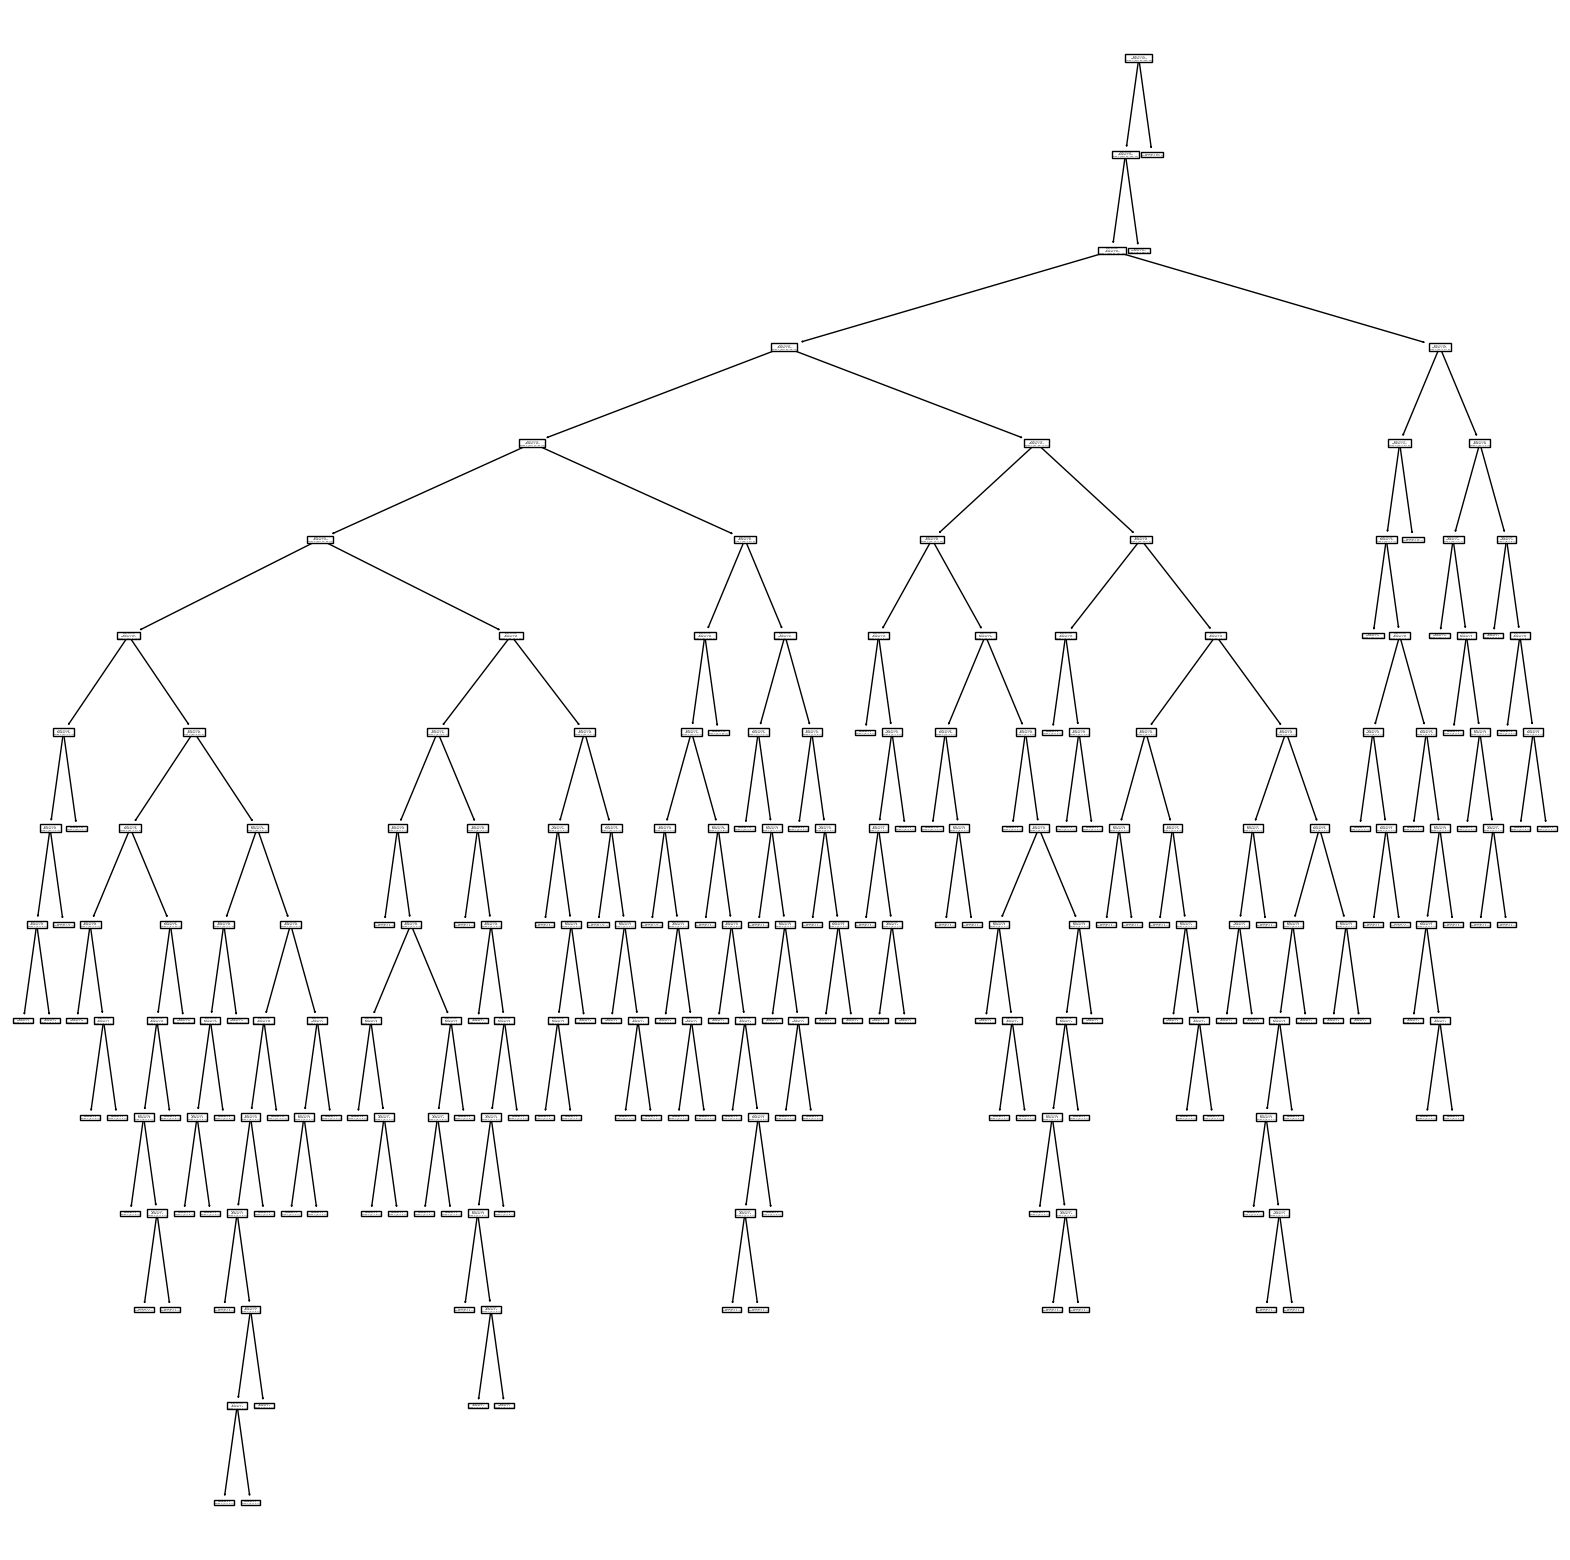

In [19]:
plt.figure(figsize = (20,20))
tree.plot_tree(dt_model.fit(x_train, y_train))

# GridSearch For parameters of DecisionTreeClassifier

In [20]:
# parameters of decision tree
param = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [10,20,30,40],
    'min_samples_split' : list(range(1,10)),
    'min_samples_leaf' : list(range(1,10))
}

In [ ]:
gs = GridSearchCV(dt_model, param, cv = 5)
gs.fit(x_train, y_train)

In [ ]:
print(gs.best_params_)

In [ ]:
print(gs.best_score_)

In [ ]:
# Decision Tree For the be